# Imports
---

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [2]:
df = pd.read_csv('Data/data_cleaned.csv')

In [3]:
df.shape

(25697, 16)

In [5]:
df.columns

Index(['action_type', 'combined_shot_type', 'minutes_remaining', 'period',
       'playoffs', 'season', 'seconds_remaining', 'shot_distance',
       'shot_made_flag', 'shot_type', 'shot_zone_area', 'shot_zone_basic',
       'shot_zone_range', 'game_date', 'matchup', 'opponent'],
      dtype='object')

# EDA
---

In [6]:
def descriptive_stats(col):
    unique_values = df[col].unique()

    print(f'{df[col].describe()}\n \
    \n# of Unique values:{df[col].nunique()} \
    \n\nUnique values: {unique_values}')
    
    if df[col].dtypes != object:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        min_boxplot = Q1 - (1.5 * IQR)
        max_boxplot = Q3 + (1.5 * IQR)
        print(f'\nMin of boxplot:{min_boxplot: .2f}\nMax of boxplot: {max_boxplot:.2f}')       

In [7]:
def plotcat(feature):
    plt.figure(figsize=(12,8))
    sns.countplot(x=feature, hue='shot_made_flag', data=df, palette={1:'gold', 0:'purple'});

    plt.title(feature + ' vs target', 
              fontsize=18, fontweight='bold', color='firebrick', loc='left')
    
    plt.ylabel('count', fontsize=16)
    plt.xlabel(feature, fontsize=16)

    color_patches = [
        Patch(facecolor="gold", label='Shot Made'),
        Patch(facecolor="purple", label='Shot Missed')
    ]

    plt.legend(handles=color_patches)

    plt.xticks(rotation=45, fontsize=14); 

In [8]:
def box_plot(column_name):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 10))

    sns.boxplot(data=df[column_name], 
                ax=ax1,
                showmeans=True, 
                width=0.5,
                palette=('gold', 8))
    
    ax2.hist(df[column_name], color='purple', orientation='horizontal')    

    ax1.set_title(column_name + ' - Boxplot',
                 fontsize=18, 
                 fontweight='bold', 
                 color='firebrick', 
                 loc='left')
    ax2.set_title(column_name + ' Frequency',
                 fontsize=18, 
                 fontweight='bold', 
                 color='firebrick', 
                 loc='left')
    
    ax1.set_ylabel(column_name, fontsize=16)
    
    ax2.set_ylabel(column_name, fontsize=16)
    ax2.set_xlabel('Frequency', fontsize=16)
    
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax2.tick_params(axis='both', which='major', labelsize=14)

    ax1.set_facecolor('whitesmoke')
    ax2.set_facecolor('whitesmoke');

In [9]:
def multihist(col):
    plt.figure(figsize=(12,8))
    plt.hist(df[df['shot_made_flag']==1][col], 
             bins=10, alpha=0.7, color='black', label='Shot Made')
    plt.hist(df[df['shot_made_flag']==0][col], 
             bins=10, alpha=0.5, color='gold', label='Shot Missed')

    plt.title(col + ' vs Shot Made', 
              fontsize=18, fontweight='bold', color='firebrick', loc='left')
    
    plt.xlabel(col, fontsize=14)
    plt.ylabel('count', fontsize=14)

    plt.legend();

## Let's look at `action_type` feature.

In [10]:
descriptive_stats('action_type')

count         25697
unique           55
top       Jump Shot
freq          15836
Name: action_type, dtype: object
     
# of Unique values:55     

Unique values: ['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Reverse Dunk Shot' 'Slam Dunk Shot' 'Driving Layup Shot'
 'Turnaround Jump Shot' 'Reverse Layup Shot' 'Tip Shot'
 'Running Hook Shot' 'Alley Oop Dunk Shot' 'Dunk Shot'
 'Alley Oop Layup shot' 'Running Dunk Shot' 'Driving Finger Roll Shot'
 'Running Layup Shot' 'Finger Roll Shot' 'Fadeaway Jump Shot'
 'Follow Up Dunk Shot' 'Hook Shot' 'Turnaround Hook Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Tip Shot'
 'Running Reverse Layup Shot' 'Driving Finger Roll Layup Shot'
 'Fadeaway Bank shot' 'Pullup Jump shot' 'Finger Roll Layup Shot'
 'Turnaround Fadeaway shot' 'Driving Reverse Layup Shot'
 'Driving Slam Dunk Shot' 'Step Back Jump shot' 'Turnaround Bank shot'
 'Rev

### Kobe had 55 unique different types of shots in his arsenal. His most common was the jump shot with over 15k shot attempts.

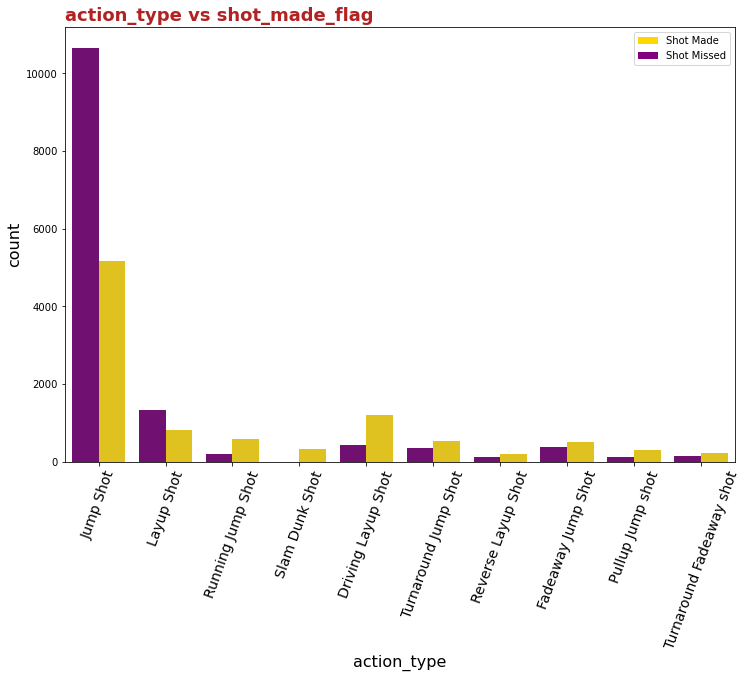

In [44]:
top_10_most_frequent_shots = df['action_type'].value_counts()[:10].index

plt.figure(figsize=(12,8))
sns.countplot(x='action_type', hue='shot_made_flag', data=df.loc[df['action_type'].isin(top_10_most_frequent_shots)]
              , palette={1:'gold', 0:'purple'});

plt.title('action_type' + ' vs shot_made_flag', 
          fontsize=18, fontweight='bold', color='firebrick', loc='left')

plt.ylabel('count', fontsize=16)
plt.xlabel('action_type', fontsize=16)

color_patches = [
    Patch(facecolor="gold", label='Shot Made'),
    Patch(facecolor="purple", label='Shot Missed')
]

plt.legend(handles=color_patches)

plt.xticks(rotation=70, fontsize=14); 

### Kobe missed more jump shots than he made but was still his most made shot type by far. Out of his 10 most common shot types Kobe only missed more on jump shots and layup shots. Every other shot type he made more than he missed.

## Now let's look at `combined_shot_type` feature.

In [46]:
descriptive_stats('combined_shot_type')

count         25697
unique            6
top       Jump Shot
freq          19710
Name: combined_shot_type, dtype: object
     
# of Unique values:6     

Unique values: ['Jump Shot' 'Dunk' 'Layup' 'Tip Shot' 'Hook Shot' 'Bank Shot']


### Kobe's most frequent combined shot type was jump shot. He had over 19k shots of this combined shot type.

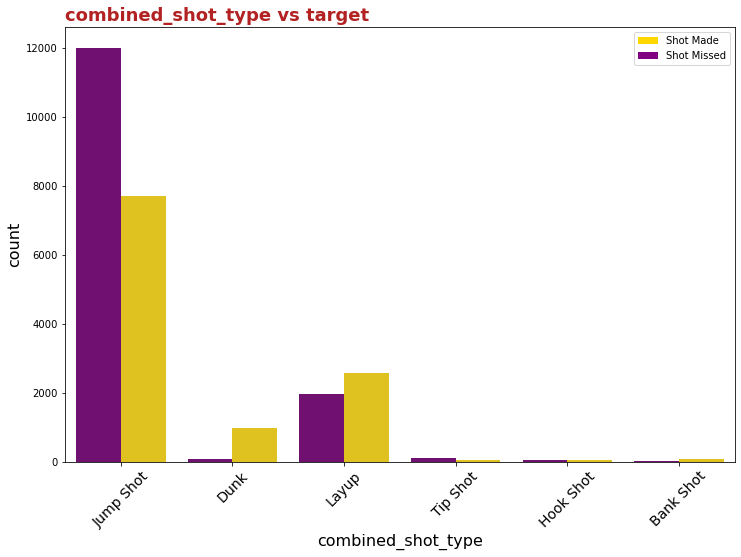

In [47]:
plotcat('combined_shot_type')

### Kobe's combined shot types where he made more than he missed were, Dunks, Layups, Bank Shots. 

## Now let's look at `minutes_remaining` feature.

In [48]:
descriptive_stats('minutes_remaining')

count    25697.000000
mean         4.886796
std          3.452475
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         11.000000
Name: minutes_remaining, dtype: float64
     
# of Unique values:12     

Unique values: [10  7  6  9  8  3  1 11  2  0  5  4]

Min of boxplot:-7.00
Max of boxplot: 17.00


### Looks like our data looks normal with a mean and median minutes remaining with about the same value. We are looking at minutes remaining between 0 and 11 minutes.

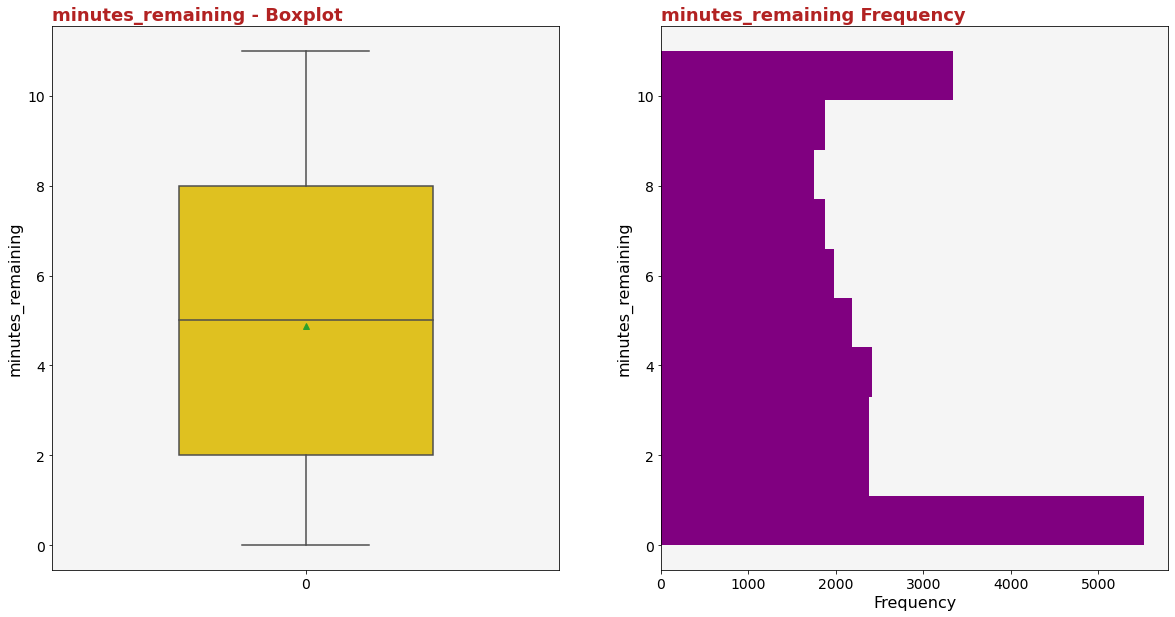

In [49]:
box_plot('minutes_remaining')

### We can see that we have no outliers in our dataset from our boxplot. We can also see that Kobe made the most shots with less than a minute remaining, followed by more than 10 minutes remaining as second highest frequency.

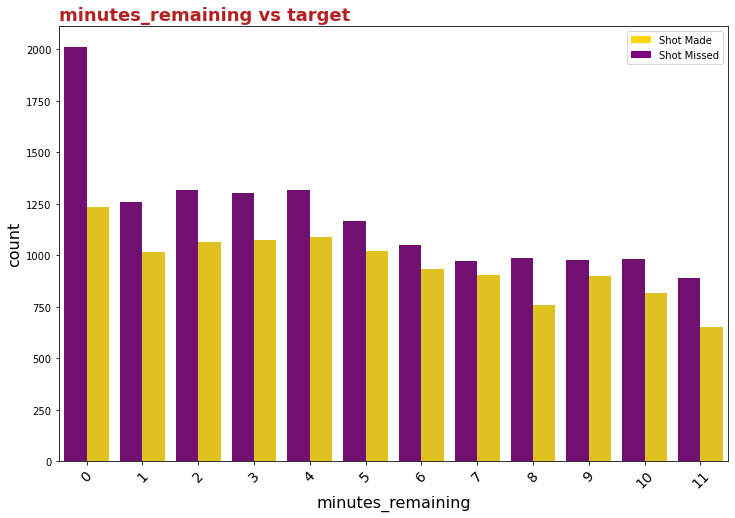

In [55]:
plotcat('minutes_remaining')

### When minutes remaining was less than 2 Kobe missed over 3000 shots but also made over 2000. Generally he missed more than he made but around 5-7 minutes that gap was less than usual.

## Now let's look at `period` feature.

In [51]:
descriptive_stats('period')

count    25697.000000
mean         2.520800
std          1.151626
min          1.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          7.000000
Name: period, dtype: float64
     
# of Unique values:7     

Unique values: [1 2 3 4 5 6 7]

Min of boxplot:-2.00
Max of boxplot: 6.00


### From our descriptive statistics we can see that most periods were less than 3 with 7 periods being a clear outlier. 

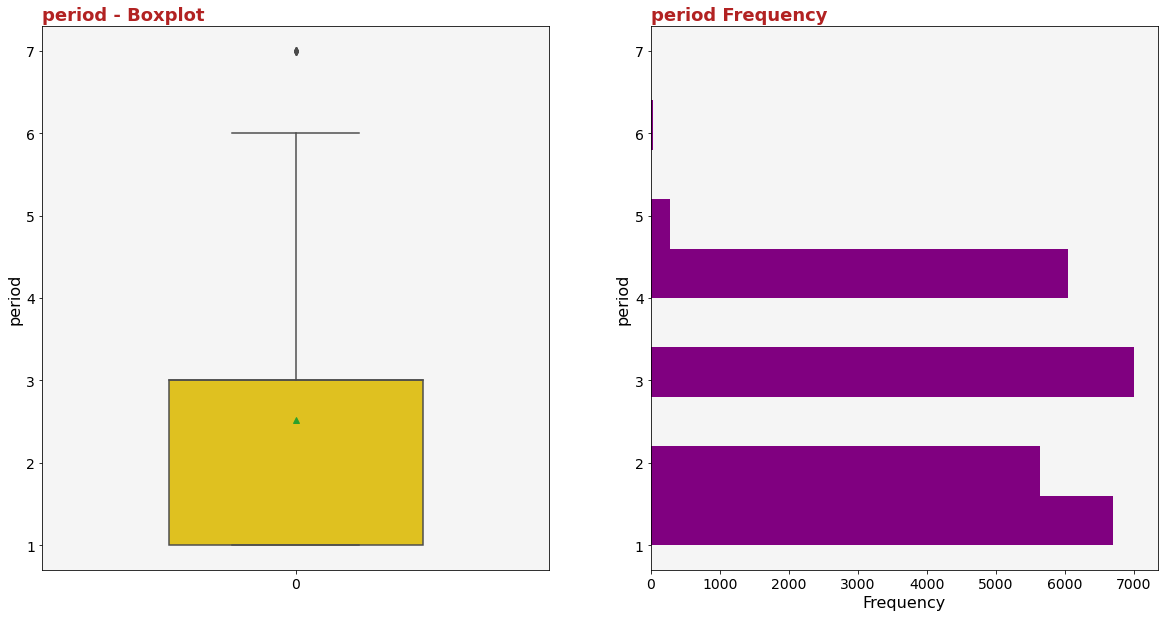

In [52]:
box_plot('period')

### From our boxplot we can see that 7 periods are a clear outlier. Our histogram shows that Kobe made most of his shots during the third period with a steep drop off after the fourth.

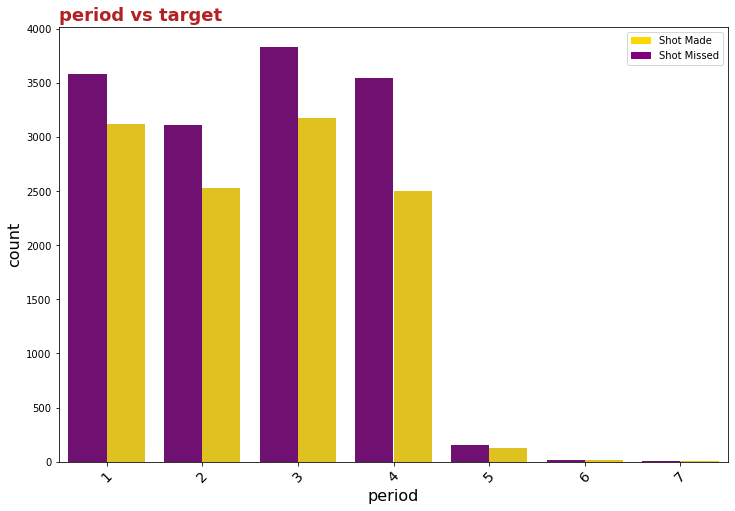

In [54]:
plotcat('period')

### Kobe missed most shots in every period, he also made the most shots during the 3rd period. After the 4th period Kobe's made and missed shots were the most balanced.

## Now let's look at `playoffs` feature.

In [56]:
descriptive_stats('playoffs')

count    25697.000000
mean         0.146243
std          0.353356
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: playoffs, dtype: float64
     
# of Unique values:2     

Unique values: [0 1]

Min of boxplot: 0.00
Max of boxplot: 0.00


### Out of all the shots Kobe made 14% of his shots were made during the playoffs.

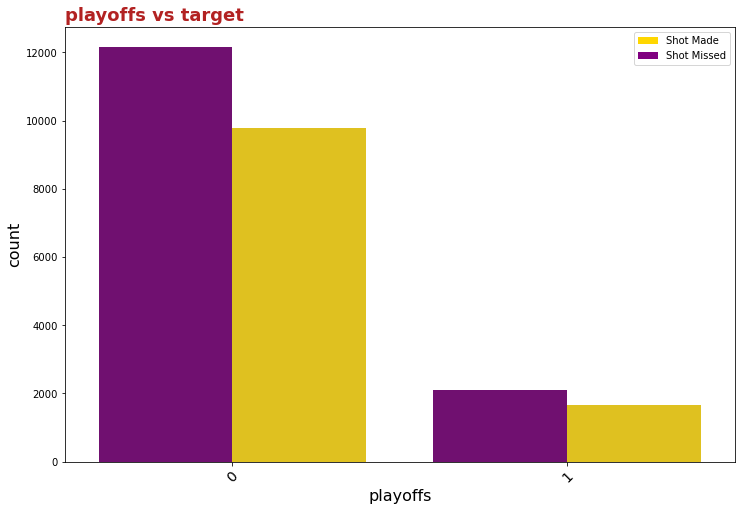

In [57]:
plotcat('playoffs')

### Whenk Kobe was in the playoffs the gap between his shots made and missed descreased significantly. During non playoff games the gap was much wider.